# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/visualization`
### Do One.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.


In [3]:
import pandas as pd
import numpy as np

file_path = "./data/college_completion.csv"
df = pd.read_csv(file_path)

2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.

In [4]:
print("Dimensions of Data:", df.shape)
print("Variables Included:", df.columns.tolist())
print(df.head())

Dimensions of Data: (3798, 63)
Variables Included: ['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count', 'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value', 'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile', 'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile', 'endow_value', 'endow_percentile', 'grad_100_value', 'grad_100_percentile', 'grad_150_value', 'grad_150_percentile', 'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile', 'ft_fac_value', 'ft_fac_percentile', 'vsa_year', 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first', 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first', 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first', 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first', 'vsa_grad_after4_transfer', 'vsa_grad_elsewhere_

3. Cross tabulate `control` and `level`. Describe the patterns you see.


In [5]:
control_level_crosstab = pd.crosstab(df['control'], df['level'])

print(control_level_crosstab)

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.


C:\Users\puckh\AppData\Local\Temp\ipykernel_50616\2548764431.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['grad_100_value'].dropna(), shade=True)


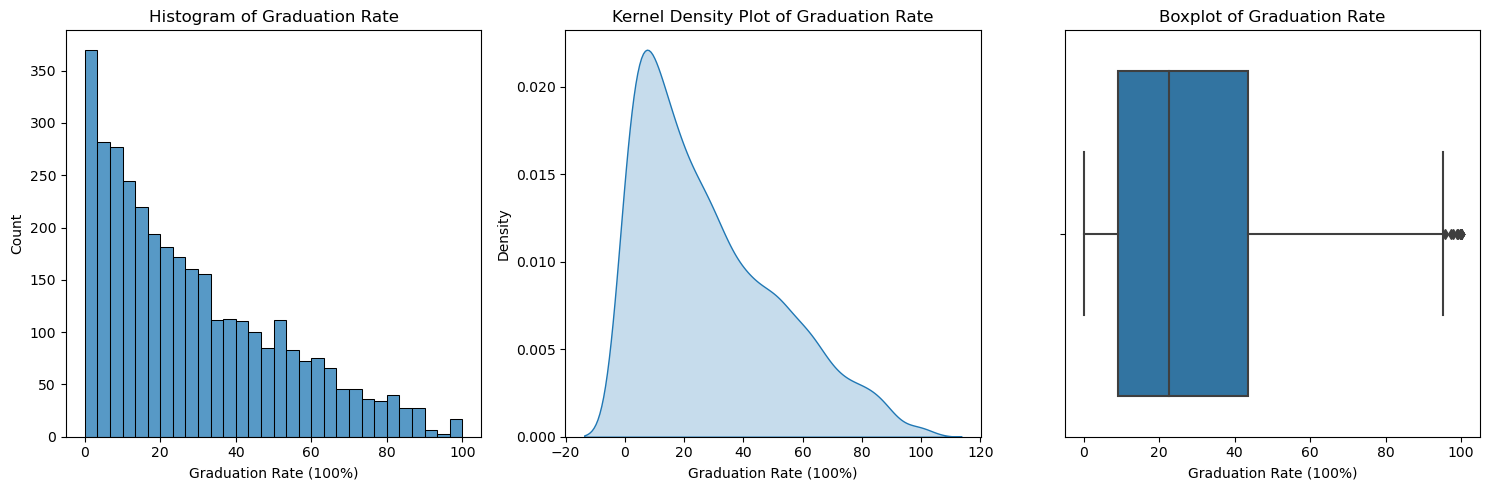

Statistical Description of Graduation Rate:
count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['grad_100_value'].dropna(), bins=30, kde=False)
plt.xlabel("Graduation Rate (100%)")
plt.ylabel("Count")
plt.title("Histogram of Graduation Rate")

plt.subplot(1, 3, 2)
sns.kdeplot(df['grad_100_value'].dropna(), shade=True)
plt.xlabel("Graduation Rate (100%)")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Graduation Rate")

plt.subplot(1, 3, 3)
sns.boxplot(x=df['grad_100_value'])
plt.xlabel("Graduation Rate (100%)")
plt.title("Boxplot of Graduation Rate")

plt.tight_layout()
plt.show()

print("Statistical Description of Graduation Rate:")
print(df['grad_100_value'].describe())

5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?


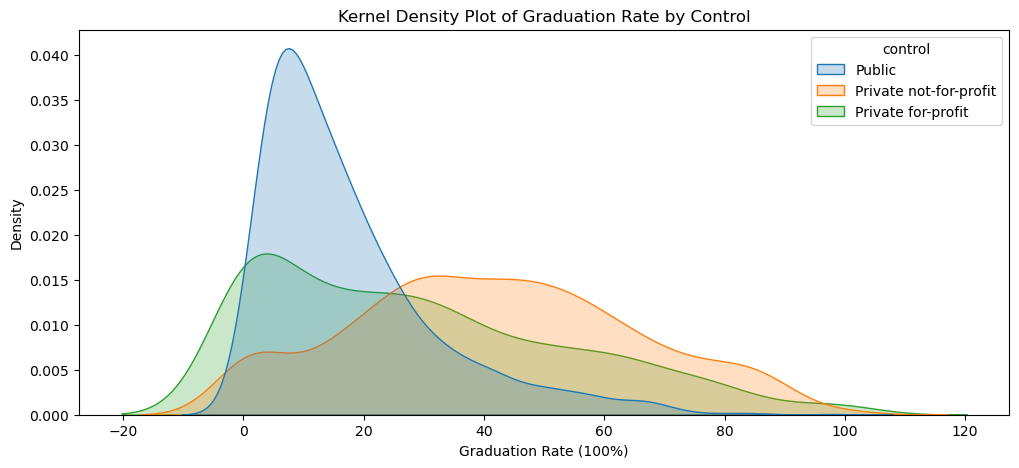

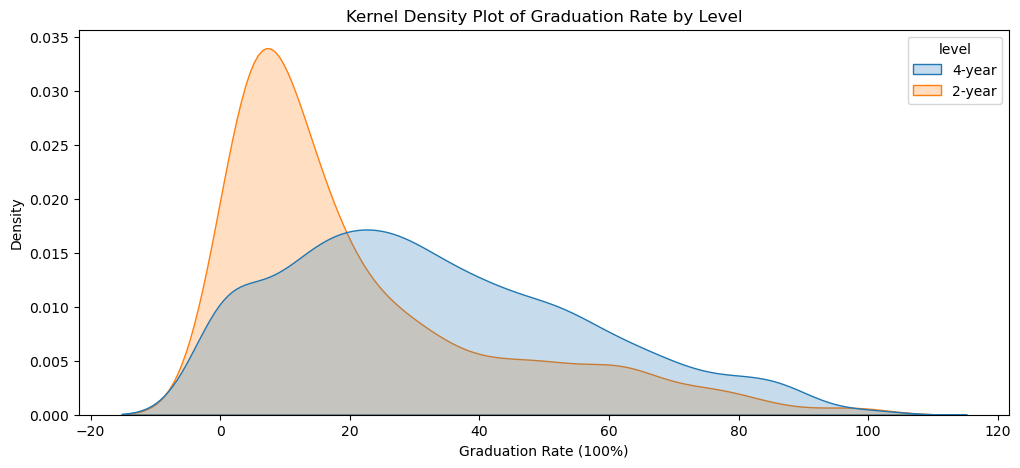

Graduation Rate Statistics by Control:
                          count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  

Graduation Rate Statistics by Level:
          count       mean        std  min   25%   50%     75%    max
level                                                               
2-year  1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year  2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0


In [ ]:
plt.figure(figsize=(12, 5))
sns.kdeplot(data=df, x='grad_100_value', hue='control', fill=True, common_norm=False)
plt.xlabel("Graduation Rate (100%)")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Graduation Rate by Control")
plt.show()

plt.figure(figsize=(12, 5))
sns.kdeplot(data=df, x='grad_100_value', hue='level', fill=True, common_norm=False)
plt.xlabel("Graduation Rate (100%)")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Graduation Rate by Level")
plt.show()

grad_stats_by_control = df.groupby('control')['grad_100_value'].describe()
grad_stats_by_level = df.groupby('level')['grad_100_value'].describe()

print("Graduation Rate Statistics by Control:\n", grad_stats_by_control)
print("\nGraduation Rate Statistics by Level:\n", grad_stats_by_level)

Private not-for-profit and 4-year institutions appear to have the best graduation rates. 

6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?


C:\Users\puckh\AppData\Local\Temp\ipykernel_50616\377907046.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='grad_100_value', hue='levelXcontrol', shade=True, common_norm=False)


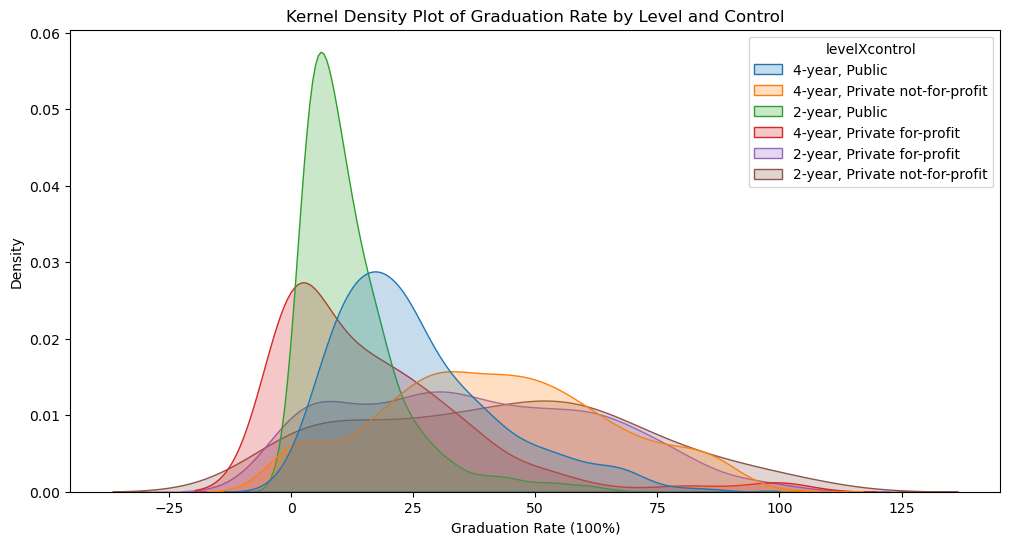

,count,mean,std,min,25%,50%,75%,max
levelXcontrol,,,,,,,,
"2-year, Private for-profit",461.0,37.197614,25.497380,0.0,15.800,33.9,57.800,100.0
"2-year, Private not-for-profit",68.0,41.913235,28.348302,0.0,16.225,44.4,61.200,100.0
"2-year, Public",926.0,12.400000,10.893600,0.0,5.100,9.4,16.175,97.8
"4-year, Private for-profit",318.0,17.382704,20.788525,0.0,0.000,12.5,26.325,100.0
"4-year, Private not-for-profit",1121.0,41.645674,23.243453,0.0,25.000,41.0,57.800,100.0
"4-year, Public",573.0,25.561082,16.403902,0.0,13.600,21.8,33.800,86.3


In [13]:
df['levelXcontrol'] = df['level'] + ', ' + df['control']

plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='grad_100_value', hue='levelXcontrol', shade=True, common_norm=False)

plt.xlabel("Graduation Rate (100%)")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Graduation Rate by Level and Control")
plt.show()

df.groupby('levelXcontrol')['grad_100_value'].describe()

4-year, private not-for-profit and 2-year, private not-for-profit institutions have the best graduation rates.

7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.


C:\Users\puckh\AppData\Local\Temp\ipykernel_50616\3235054491.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='aid_value', shade=True)


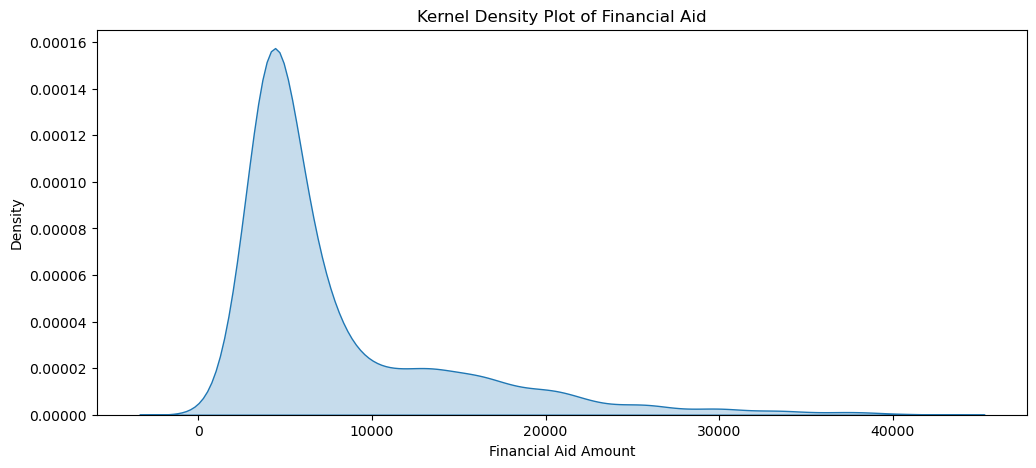

C:\Users\puckh\AppData\Local\Temp\ipykernel_50616\3235054491.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='aid_value', hue='level', shade=True, common_norm=False)


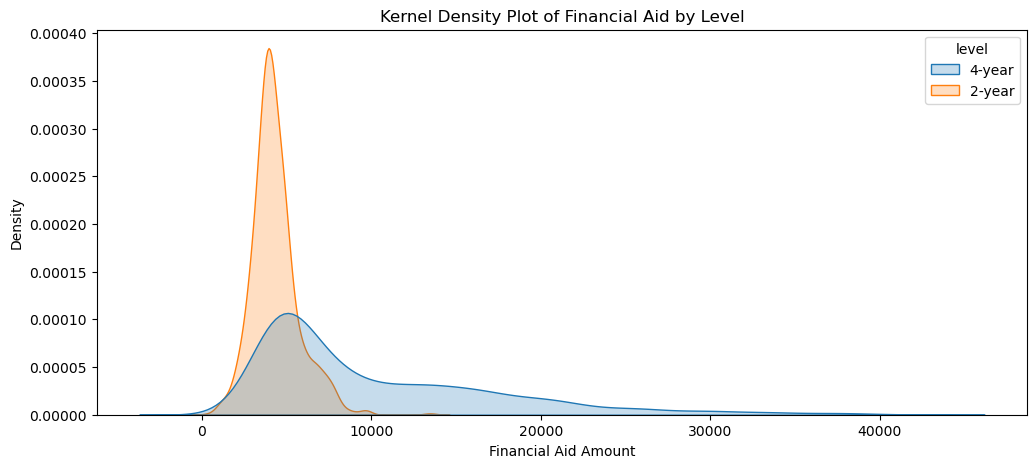

C:\Users\puckh\AppData\Local\Temp\ipykernel_50616\3235054491.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='aid_value', hue='control', shade=True, common_norm=False)


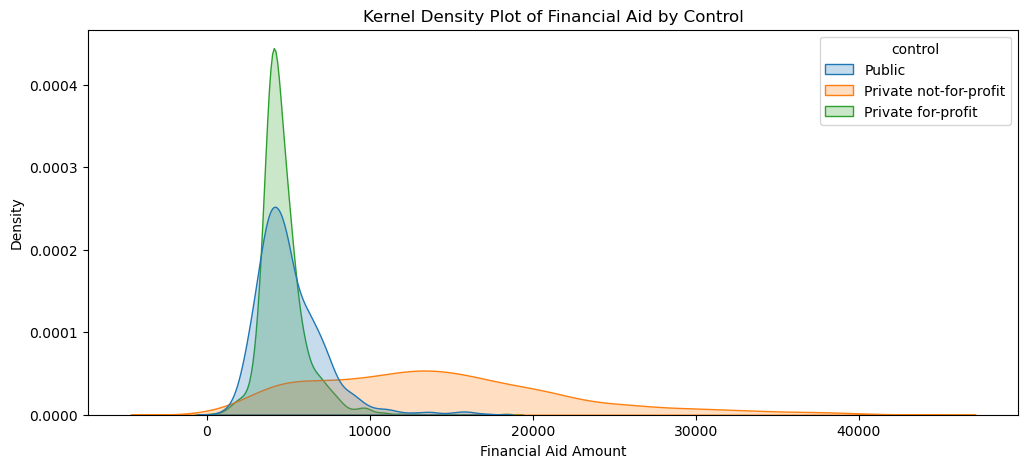

Financial Aid Statistics by Control:
                          count          mean          std    min      25%  \
control                                                                     
Private for-profit       991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit  1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                  1558.0   5094.835687  2136.436370  881.0  3725.25   

                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0  

Financial Aid Statistics by Level:
          count          mean          std    min     25%     50%      75%  \
level                                                                       
2-year  1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year  2339.0  10235.379222  7227.369167  902.0

In [15]:
plt.figure(figsize=(12, 5))
sns.kdeplot(data=df, x='aid_value', shade=True)
plt.xlabel("Financial Aid Amount")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Financial Aid")
plt.show()

plt.figure(figsize=(12, 5))
sns.kdeplot(data=df, x='aid_value', hue='level', shade=True, common_norm=False)
plt.xlabel("Financial Aid Amount")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Financial Aid by Level")
plt.show()

plt.figure(figsize=(12, 5))
sns.kdeplot(data=df, x='aid_value', hue='control', shade=True, common_norm=False)
plt.xlabel("Financial Aid Amount")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Financial Aid by Control")
plt.show()

aid_stats_by_control = df.groupby('control')['aid_value'].describe()
aid_stats_by_level = df.groupby('level')['aid_value'].describe()

print("Financial Aid Statistics by Control:\n", aid_stats_by_control)
print("\nFinancial Aid Statistics by Level:\n", aid_stats_by_level)

There is a large peak in these graphs around $5000, which indicates most financial aid is around this amount with a few bigger scholarships covering larger tuitions. 

8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

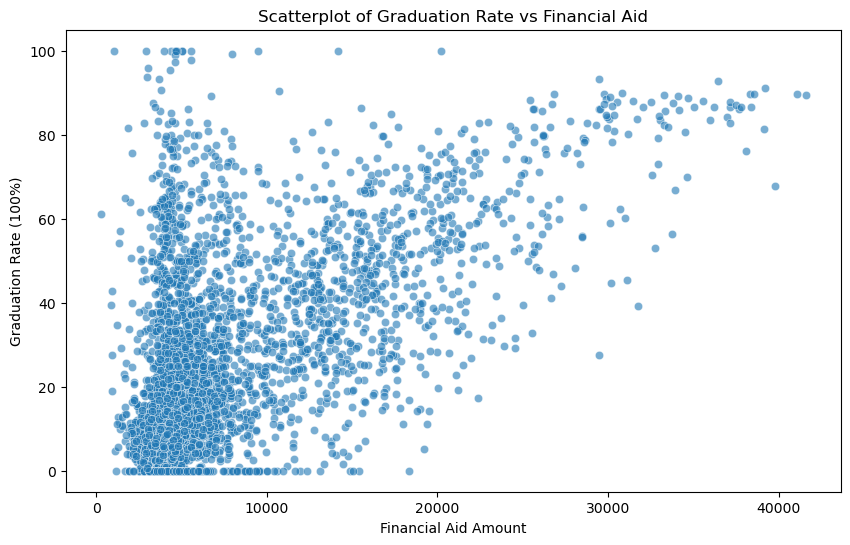

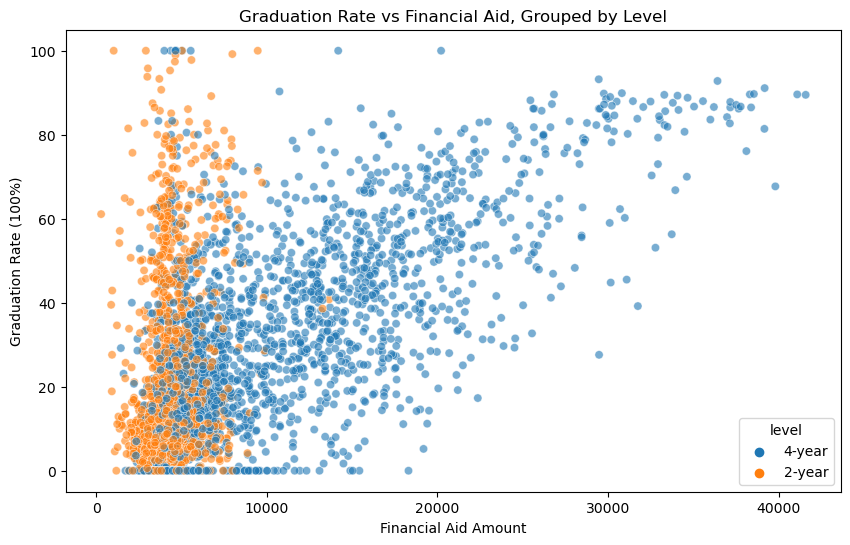

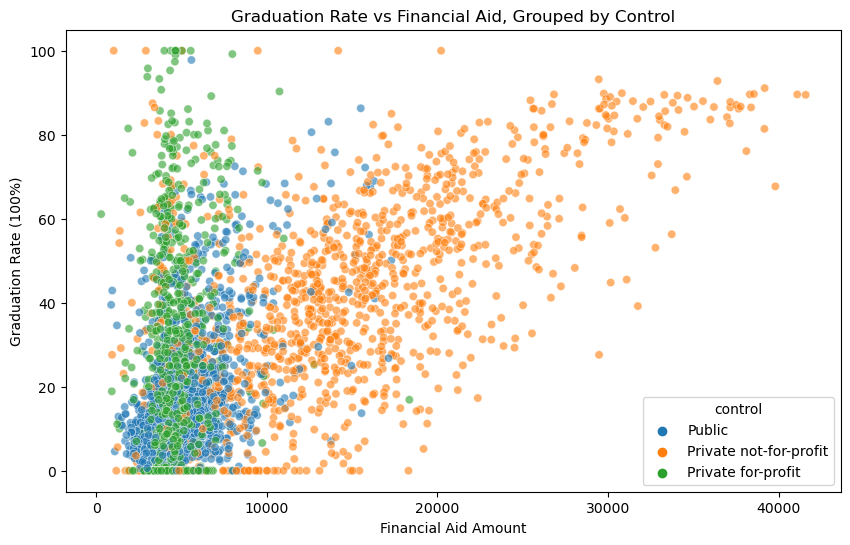

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', alpha=0.6)
plt.xlabel("Financial Aid Amount")
plt.ylabel("Graduation Rate (100%)")
plt.title("Scatterplot of Graduation Rate vs Financial Aid")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='level', alpha=0.6)
plt.xlabel("Financial Aid Amount")
plt.ylabel("Graduation Rate (100%)")
plt.title("Graduation Rate vs Financial Aid, Grouped by Level")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='control', alpha=0.6)
plt.xlabel("Financial Aid Amount")
plt.ylabel("Graduation Rate (100%)")
plt.title("Graduation Rate vs Financial Aid, Grouped by Control")
plt.show()

Aid seems to increase graduation rates primarily in 4-year institutions, especially private not-for-profit colleges. 2-year institutions do not show a strong positive relationship between financial aid and graduation rates, likely due to the high transfer-out rates. For-profit institutions show weak relationships between aid and graduation rates, implying that factors like institutional quality and student support may be more influential.

**Q2.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them? 
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

**Q3.** This is a case study about understanding and visualizing risk over time, involving a dataset with information about breast cancer mortality rates over time, conditional on different treatments.

1. Load the `./data/Breast Cancer METABRIC.csv` dataset. It has a bunch of interesting variables, but the mains of interest for this question are `Overall Survival (Months)`, which is  and `Overall Survival Survival Status`, which records whether the patient is Alive or Deceased.
2. Make one kernel density plot of `Overall Survival (Months)`, and a second conditional on `Overall Survival Status`. Interpret these plots. What patterns do you see? 

3. The **hazard rate** gives the instantaneous risk of an event occurring, given that it hasn't already happened. It is defined as
$$
h(t) = \dfrac{f(t)}{1-F(t)}
$$
where $F(t)$ is the distribution of arrival times and $f(t)=F'(t)$ is the density of arrival times. Roughly, conditional on $T \ge t$, what is the probability that $T=t$? The cumulative hazard is given by
$$
H(t) = \int_0^t h(z) dz.
$$
The following function computes the hazard rate and cumulative hazard using something called the Nelson-Ahlen estimator. Run your data through it. Interpret the plots for the hazard rate and cumulative hazard rate. What patterns do you see?

```
def hazard(df):
    """ Compute cumulative hazard rate using Nelson-Ahlen estimator. """
    at_risk = df.shape[0]
    arrivals = df['survival'].sort_values().dropna().tolist()
    hazard_rate = []
    times = []
    for t in arrivals:
        select = (df['survival']==t)*(df['Overall Survival Status']=='Deceased')
        deaths_t = df[select].shape[0]
        if deaths_t > 0:
            hazard_rate.append(deaths_t/at_risk)
            times.append(t)
            at_risk -= deaths_t
    cumulative_hazard = np.cumsum(hazard_rate)
    return cumulative_hazard, times, hazard_rate
```

4. There are lots of additional categorical variables in the METABRIC dataset. Pick a categorical variable, and plot the hazard rate and cumulative hazard for each category. Do you see any interesting patterns? Is one group more likely to survive, or do their hazard rates cross over time?
5. These plots are very helpful for understanding how patients respond to treatment. Discuss how they might be used in practice, to help doctors and patients make decisions about care.

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform 
$$
k(z) = \begin{cases} 
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is 
$$
k(z) = \begin{cases} 
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.